In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models
import torchvision.transforms as transforms

In [2]:
# Load a pre-trained ResNet model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
img = cv2.imread('./1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

scale = 0.2
width = int(img.shape[1] * scale)
height = int(img.shape[0] * scale)
img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

img.shape

(349, 500, 3)

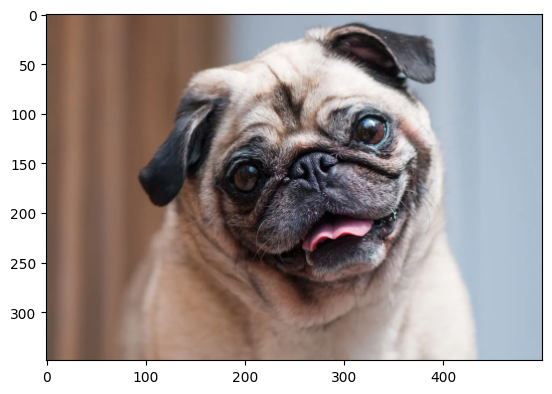

In [4]:
plt.imshow(img)

In [5]:
# Image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [6]:
input_tensor = transform(img).unsqueeze(0)

In [7]:
def visualize_feature_maps(w, nn=8):
    n_row, n_col = nn, int(w.shape[0] / nn)
    plt.figure(figsize=[n_row, n_col])
    count = 0
    for i in range(w.shape[0]):
        plt.subplot(n_row, n_col, count + 1)
        count += 1
        plt.imshow(w[i], cmap='gray')
        plt.axis('off')
    plt.show()

In [8]:
feature_maps = model.layer1(
    model.maxpool(model.relu(model.bn1(model.conv1(input_tensor))))
)[0, :].detach().numpy()
feature_maps, feature_maps.shape

(array([[[0.17969239, 0.28289914, 0.22835767, ..., 0.09070492,
          0.21932621, 0.3410648 ],
         [0.08133233, 0.3693585 , 0.23325667, ..., 0.31740665,
          0.49823105, 0.50822437],
         [0.07376125, 0.36640918, 0.20505336, ..., 0.14239836,
          0.3609654 , 0.45967683],
         ...,
         [0.06467101, 0.2668249 , 0.16014132, ..., 0.23213467,
          0.36651194, 0.38780004],
         [0.20397636, 0.52257377, 0.40826607, ..., 0.6969158 ,
          0.79636896, 0.59704477],
         [0.02787986, 0.27951193, 0.2869909 , ..., 0.5228199 ,
          0.54117084, 0.448084  ]],
 
        [[0.85773665, 0.62827206, 0.51691544, ..., 0.5038692 ,
          0.78419715, 0.49201357],
         [0.48141834, 0.2758065 , 0.2073869 , ..., 0.2758333 ,
          0.75921655, 0.28427732],
         [0.7178459 , 0.75760245, 0.7450706 , ..., 0.82545745,
          1.2918761 , 0.6630967 ],
         ...,
         [0.6602633 , 0.73215187, 0.6318251 , ..., 0.269426  ,
          0.7554083 , 0.

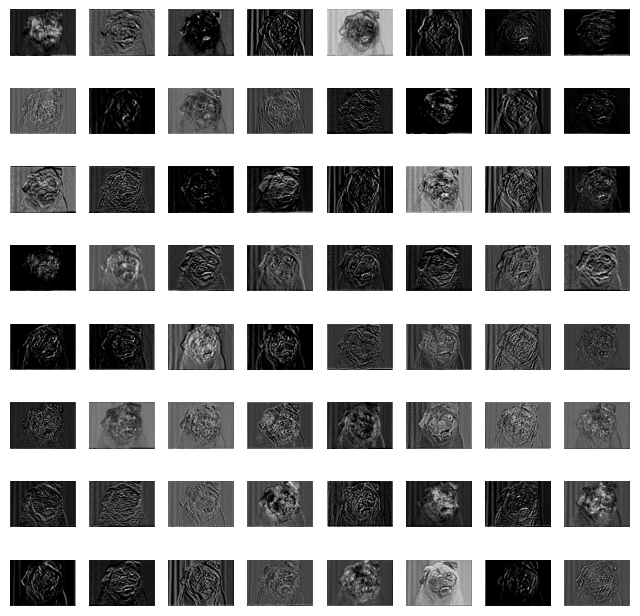

In [9]:
visualize_feature_maps(feature_maps)

In [10]:
feature_maps = model.layer3(
    model.layer2(model.layer1(model.maxpool(model.relu(model.bn1(model.conv1(input_tensor))))))
)[0, :].detach().numpy()
feature_maps, feature_maps.shape

(array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.06564984e-02],
         [2.13301182e-02, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.04870605e-01, 2.43786722e-04, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 1.48573726e-01, ...,
          3.97915721e-01, 1.06023043e-01, 0.00000000e+00],
         [1.52081490e-01, 8.44063461e-02, 3.44653577e-01, ...,
          4.30783987e-01, 1.58074573e-01, 1.90904886e-01],
         [2.53415734e-01, 1.17962785e-01, 2.85224050e-01, ...,
          4.59885836e-01, 2.68633723e-01, 1.42390072e-01]],
 
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 6.98608607e-02, 1.05214357e-01],
       

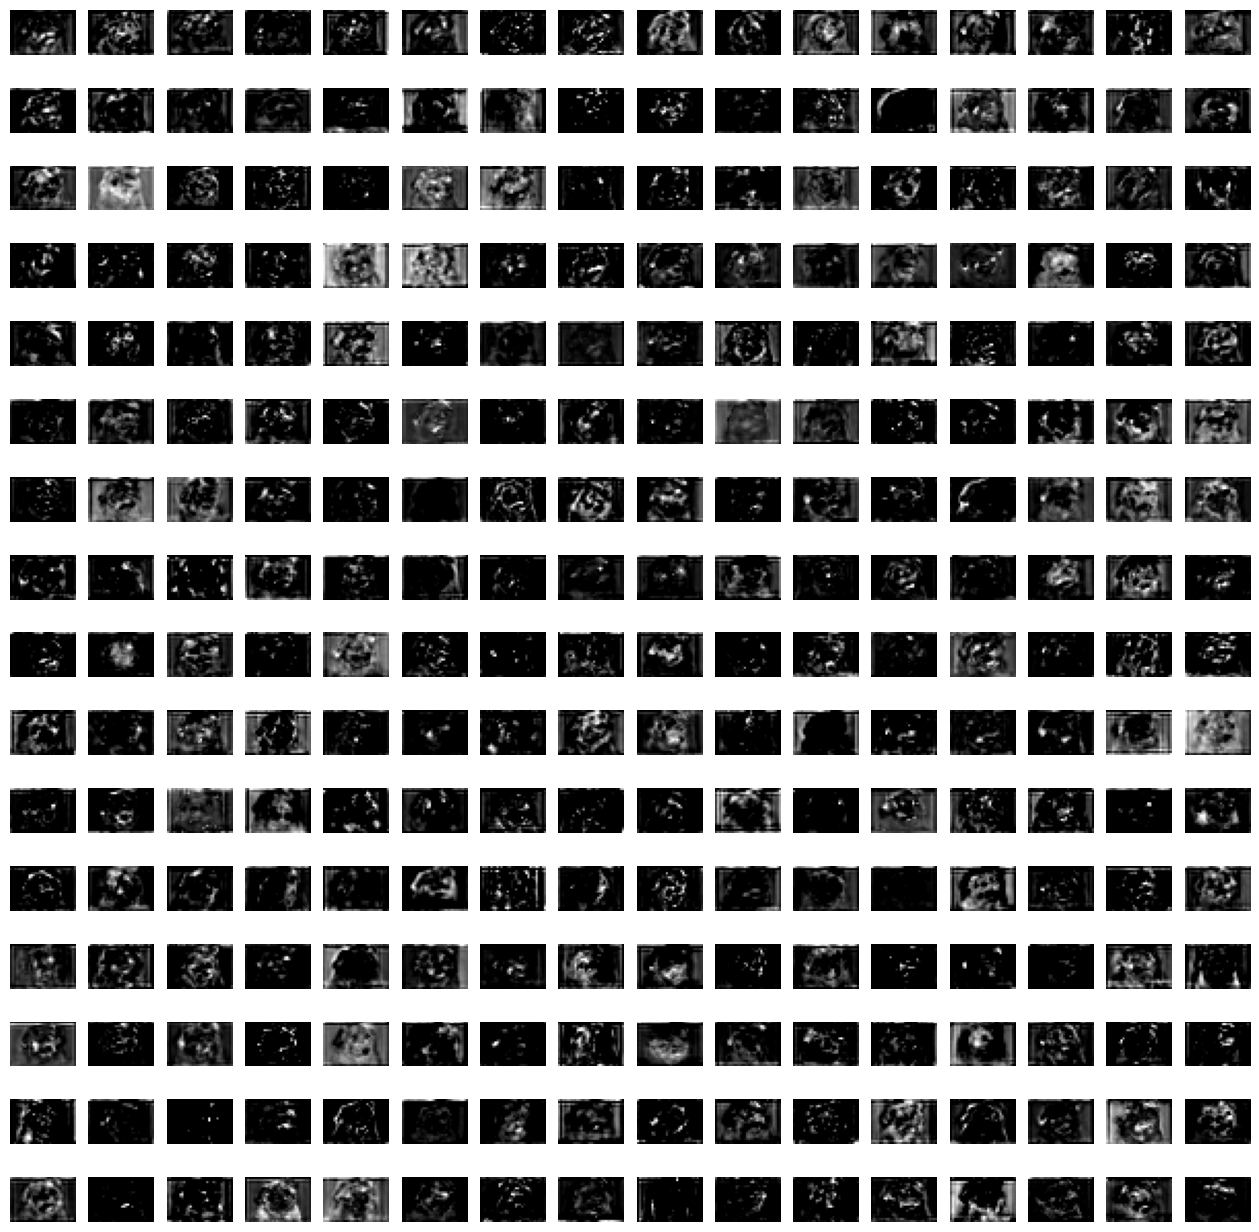

In [11]:
visualize_feature_maps(feature_maps, nn=16)